<a href="https://colab.research.google.com/github/jalalrahmanov/Projects/blob/master/FakeNewsPredictionProject_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome!

In [1]:
ls

drive/  sample_data/


In [2]:
pwd

'/content'

In [3]:
#changing the working directory
%cd /content/drive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/drive/My Drive/Kaggle


In [4]:
pwd

'/content/drive/My Drive/Kaggle'

In [5]:
ls

FakeNewsPredictionProject.ipynb            ResumeParserProject
How_Logistic_Regression_Works.PNG          submit.csv
kaggle.json                                test.csv
news_dataset_general_content_stemming.csv  train.csv
qeyd.txt


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# /content/drive/MyDrive/Kaggle is the path where kaggle.json is present in the Google Drive

In [7]:
# !kaggle competitions download -c fake-news

In [8]:
ls

FakeNewsPredictionProject.ipynb            ResumeParserProject
How_Logistic_Regression_Works.PNG          submit.csv
kaggle.json                                test.csv
news_dataset_general_content_stemming.csv  train.csv
qeyd.txt


In [9]:
#unzipping the zip files and deleting the zip files
# !unzip \fake-news.zip  && rm fake-news.zip

# About Dataset

## train.csv: 
A full training dataset with the following attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

### 1: unreliable

### 0: reliable

## test.csv: 
A testing training dataset with all the same attributes at train.csv without the label.

## submit.csv: 
A sample submission that you can

In [10]:
#below there is some research results about this cell
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords     #natural language tool kit. example of stopwords: and, or, the (no need to these words)
from nltk.stem.porter import PorterStemmer     #will remove prefixes and suffixes from words
from sklearn.feature_extraction.text import TfidfVectorizer      #convert text into feature vectors. They are numbers????????????????????????????????????
from sklearn.model_selection import train_test_split       #for divide data into train and test
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### You can read the article on request

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora. The list of available corpora is given at: https://www.nltk.org/nltk_data/ Each corpus reader class is specialized to handle a specific corpus format.

A corpus is a large and structured set of machine-readable texts that have been produced in a natural communicative setting. Its plural is corpora. They can be derived in different ways like text that was originally electronic, transcripts of spoken language and optical character recognition, etc.

A corpus is a collection of authentic text or audio organized into datasets. Authentic here means text written or audio spoken by a native of the language or dialect. A corpus can be made up of everything from newspapers, novels, recipes, radio broadcasts to television shows, movies, and tweets.

What is Porter stemmer in Python?

Stemming Words

from nltk.stem import PorterStemmer from nltk.stem import LancasterStemmer. nltk. stem is a package that performs stemming using different classes. PorterStemmer is one of the classes, so we import it using the above line of code

What is TfidfVectorizer?
Word Frequencies with TfidfVectorizer

This is an acronym than stands for **“Term Frequency – Inverse Document” Frequency** which are the components of the resulting scores assigned to each word. Term Frequency: This summarizes how often a given word appears within a document.


Reference: 

https://www.datacamp.com/tutorial/stemming-lemmatization-python

https://www.nltk.org/api/nltk.stem.porter.html

https://www.nltk.org/howto/stem.html

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
print(stopwords.words('english'))     #these words are not necessary

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Pre-processing part

In [13]:
news_dataset_ = pd.read_csv('/content/drive/MyDrive/Kaggle/train.csv')

In [14]:
news_dataset = news_dataset_.copy()
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
news_dataset.shape

(20800, 5)

In [16]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [17]:
# news_dataset.describe().T       #no need because 2 int column, ID and label. To be consider no valuable statistics about them 

In [18]:
news_dataset.isnull().sum()  
    
# we can replace null values with empty string

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [19]:
news_dataset.fillna('', inplace=True)

In [20]:
news_dataset.isnull().sum() 

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [21]:
# do feature extraction. Increase meaningful column numbers
# news_dataset['general_content'] = news_dataset['author'] + ' ' + news_dataset['title'] + ' ' + news_dataset['text']     #no need because of time
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [22]:
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


### Preparing data for modelling

In [23]:
X = news_dataset.drop(columns = ['label'], axis = 1)
y = news_dataset['label']

In [24]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [25]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Stemming

Reduce words to their root word

example:
actor, actress, acting --> root is: act

wil will create number vectors for modelling

In [26]:
port_stem = PorterStemmer()

In [27]:
def stemming(content):                                   
  stemmed_content = re.sub('[^a-zA-Z]',' ', content)     #choose only words, not numbers or anything else. replace unnecessary to space 
  stemmed_content = stemmed_content.lower()    #ML can think uppercase words are more significant   
  stemmed_content = stemmed_content.split()    #convert to list. split into the list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   #stemming. but here take word and delete
                                                                                                                   #because theese are stopwords, not 
                                                                                                                   #significant
  stemmed_content = ' '.join(stemmed_content)    #liability of stemming function. join all words together
  return stemmed_content

In [28]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
# news_dataset['general_content'] = news_dataset['general_content'].apply(stemming)     #because of time

In [29]:
print(news_dataset[['content']])

                                                 content
0      darrel lucu hous dem aid even see comey letter...
1      daniel j flynn flynn hillari clinton big woman...
2                 consortiumnew com truth might get fire
3      jessica purkiss civilian kill singl us airstri...
4      howard portnoy iranian woman jail fiction unpu...
...                                                  ...
20795  jerom hudson rapper trump poster child white s...
20796  benjamin hoffman n f l playoff schedul matchup...
20797  michael j de la merc rachel abram maci said re...
20798  alex ansari nato russia hold parallel exercis ...
20799                          david swanson keep f aliv

[20800 rows x 1 columns]


In [30]:
# print(news_dataset[['general_content']])     #no need because of time

In [31]:
#separate the data and label
# X = news_dataset[['content', 'general_content']].values         #no need because of time
X = news_dataset['content'].values
y = news_dataset['label'].values

In [32]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [33]:
y    #1 is fake, 0 is not fake

array([1, 0, 1, ..., 0, 1, 1])

In [34]:
#convert text to numeric data for understanding of ML
vectorizer = TfidfVectorizer()      #how many times word repeated    Tf count repetition numbers and gives more significancy to most repeated words.
                                    # idf reduces words that repeated many times
                                    #because may be there is word that repeated all texts that's wyh it is not significant. doesn't tell anything
vectorizer.fit(X)

X = vectorizer.transform(X)

#no need to do for y, because y is actually number

## Split train-test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)   #similar proportion to be 0 and 1 for test and train

# Create model!

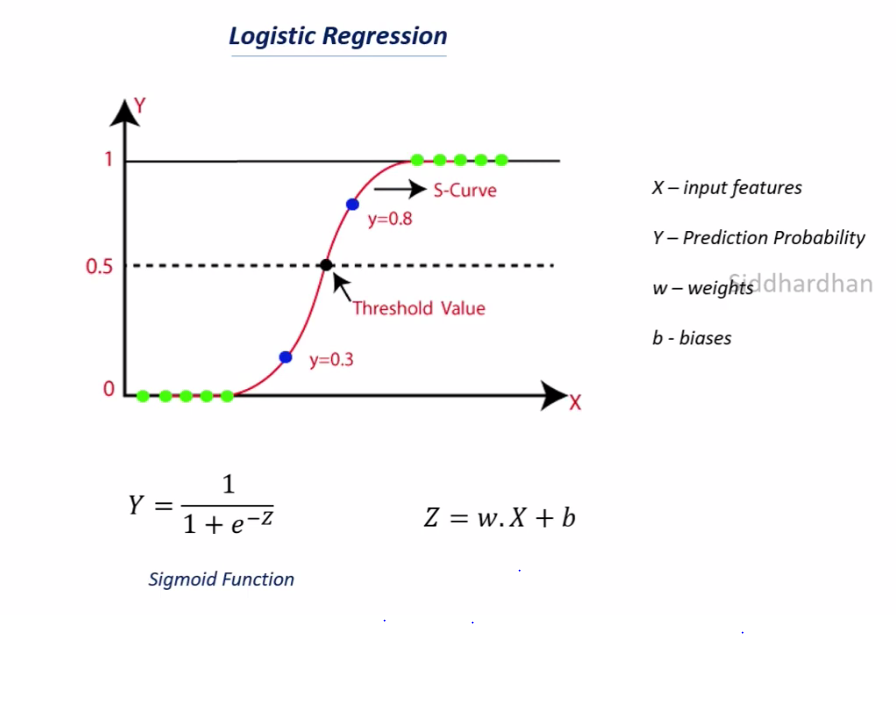

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

## Prediction

In [38]:
train_prediction = model.predict(X_train)
train_acc = accuracy_score(train_prediction, y_train)       #but test data accuracy is more important
train_acc

0.9865985576923076

### For test data

In [39]:
test_prediction = model.predict(X_test)
test_acc = accuracy_score(test_prediction, y_test)       
test_acc

0.9790865384615385

In [40]:
#check one example

X_new = X_test[4]              # first observarrion(row)

prediction = model.predict(X_new)          #fake 1     real 0         real or fake?
if prediction == 0:
  print('News is real!')
else:
  print('News is fake!')              

News is real!


In [41]:
y_test[4]        #True prediction! Good Job!

0

# Thanks!